In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 2D dataset and visualize

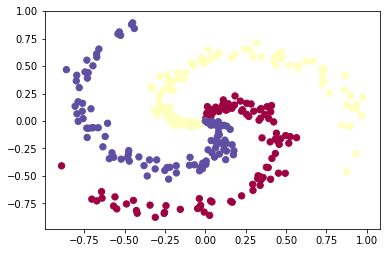

In [16]:
N = 100 
D = 2 
K = 3 
X = np.zeros((N*K,D)) 
y = np.zeros(N*K, dtype='uint8') 
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

# Softmax Linear Classifier

In [17]:
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

In [18]:
scores = np.dot(X, W) + b

In [20]:
num_examples = X.shape[0]

exp_scores = np.exp(scores)

probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
correct_logprobs = -np.log(probs[range(num_examples),y])

In [21]:

step_size = 1e-0
reg = 1e-3 

In [22]:
data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

#  Gradient with Backpropagation

In [28]:
num_examples = X.shape[0]
for i in range(200):
  

  scores = np.dot(X, W) + b 

  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print ("iteration %d: loss %f" % (i, loss))

  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W 
  
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.070674
iteration 10: loss 0.903978
iteration 20: loss 0.841196
iteration 30: loss 0.812527
iteration 40: loss 0.797649
iteration 50: loss 0.789248
iteration 60: loss 0.784223
iteration 70: loss 0.781090
iteration 80: loss 0.779075
iteration 90: loss 0.777748
iteration 100: loss 0.776858
iteration 110: loss 0.776253
iteration 120: loss 0.775836
iteration 130: loss 0.775547
iteration 140: loss 0.775344
iteration 150: loss 0.775201
iteration 160: loss 0.775100
iteration 170: loss 0.775028
iteration 180: loss 0.774977
iteration 190: loss 0.774940


In [29]:
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.52


(-1.876107479184555, 1.8838925208154484)

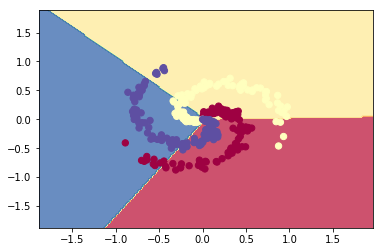

In [30]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Training a 2 layer CNN

In [31]:
h = 100 
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

step_size = 1e-0
reg = 1e-3 

num_examples = X.shape[0]
for i in range(10000):
  
  hidden_layer = np.maximum(0, np.dot(X, W) + b) 
  scores = np.dot(hidden_layer, W2) + b2

  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print ("iteration %d: loss %f" % (i, loss))
 
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
 
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)

  dhidden = np.dot(dscores, W2.T)

  dhidden[hidden_layer <= 0] = 0

  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
 
  dW2 += reg * W2
  dW += reg * W

  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098680
iteration 1000: loss 0.301907
iteration 2000: loss 0.253151
iteration 3000: loss 0.248691
iteration 4000: loss 0.248207
iteration 5000: loss 0.248041
iteration 6000: loss 0.247948
iteration 7000: loss 0.247833
iteration 8000: loss 0.247763
iteration 9000: loss 0.247753


# Training accuracy 

In [33]:
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99


(-1.876107479184555, 1.8838925208154484)

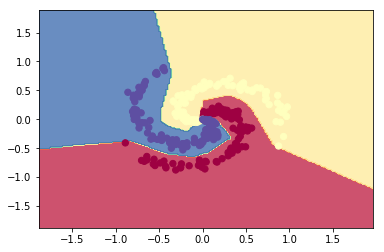

In [34]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())